In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the data
toyo = pd.read_csv(r"C:\Users\shrad\Downloads\ToyotaCorolla.csv",encoding='unicode_escape')
toyo

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [3]:
toyo=toyo.rename(columns={'Cylinders':'doors'})

In [4]:
#numbering the columns
toyo.columns
cols = toyo.columns
for i,j in enumerate(cols):
    print(i,j, end=" \n ")

0 Id 
 1 Model 
 2 Price 
 3 Age_08_04 
 4 Mfg_Month 
 5 Mfg_Year 
 6 KM 
 7 Fuel_Type 
 8 HP 
 9 Met_Color 
 10 Color 
 11 Automatic 
 12 cc 
 13 Doors 
 14 doors 
 15 Gears 
 16 Quarterly_Tax 
 17 Weight 
 18 Mfr_Guarantee 
 19 BOVAG_Guarantee 
 20 Guarantee_Period 
 21 ABS 
 22 Airbag_1 
 23 Airbag_2 
 24 Airco 
 25 Automatic_airco 
 26 Boardcomputer 
 27 CD_Player 
 28 Central_Lock 
 29 Powered_Windows 
 30 Power_Steering 
 31 Radio 
 32 Mistlamps 
 33 Sport_Model 
 34 Backseat_Divider 
 35 Metallic_Rim 
 36 Radio_cassette 
 37 Tow_Bar 
 

In [5]:
toyo1 = pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo1

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [6]:
#number of (rows,columns)
toyo1.shape

(1436, 9)

In [7]:
#information about non-null count and data type
toyo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
# check for missing values
toyo1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [9]:
# correlation matrix
toyo1.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

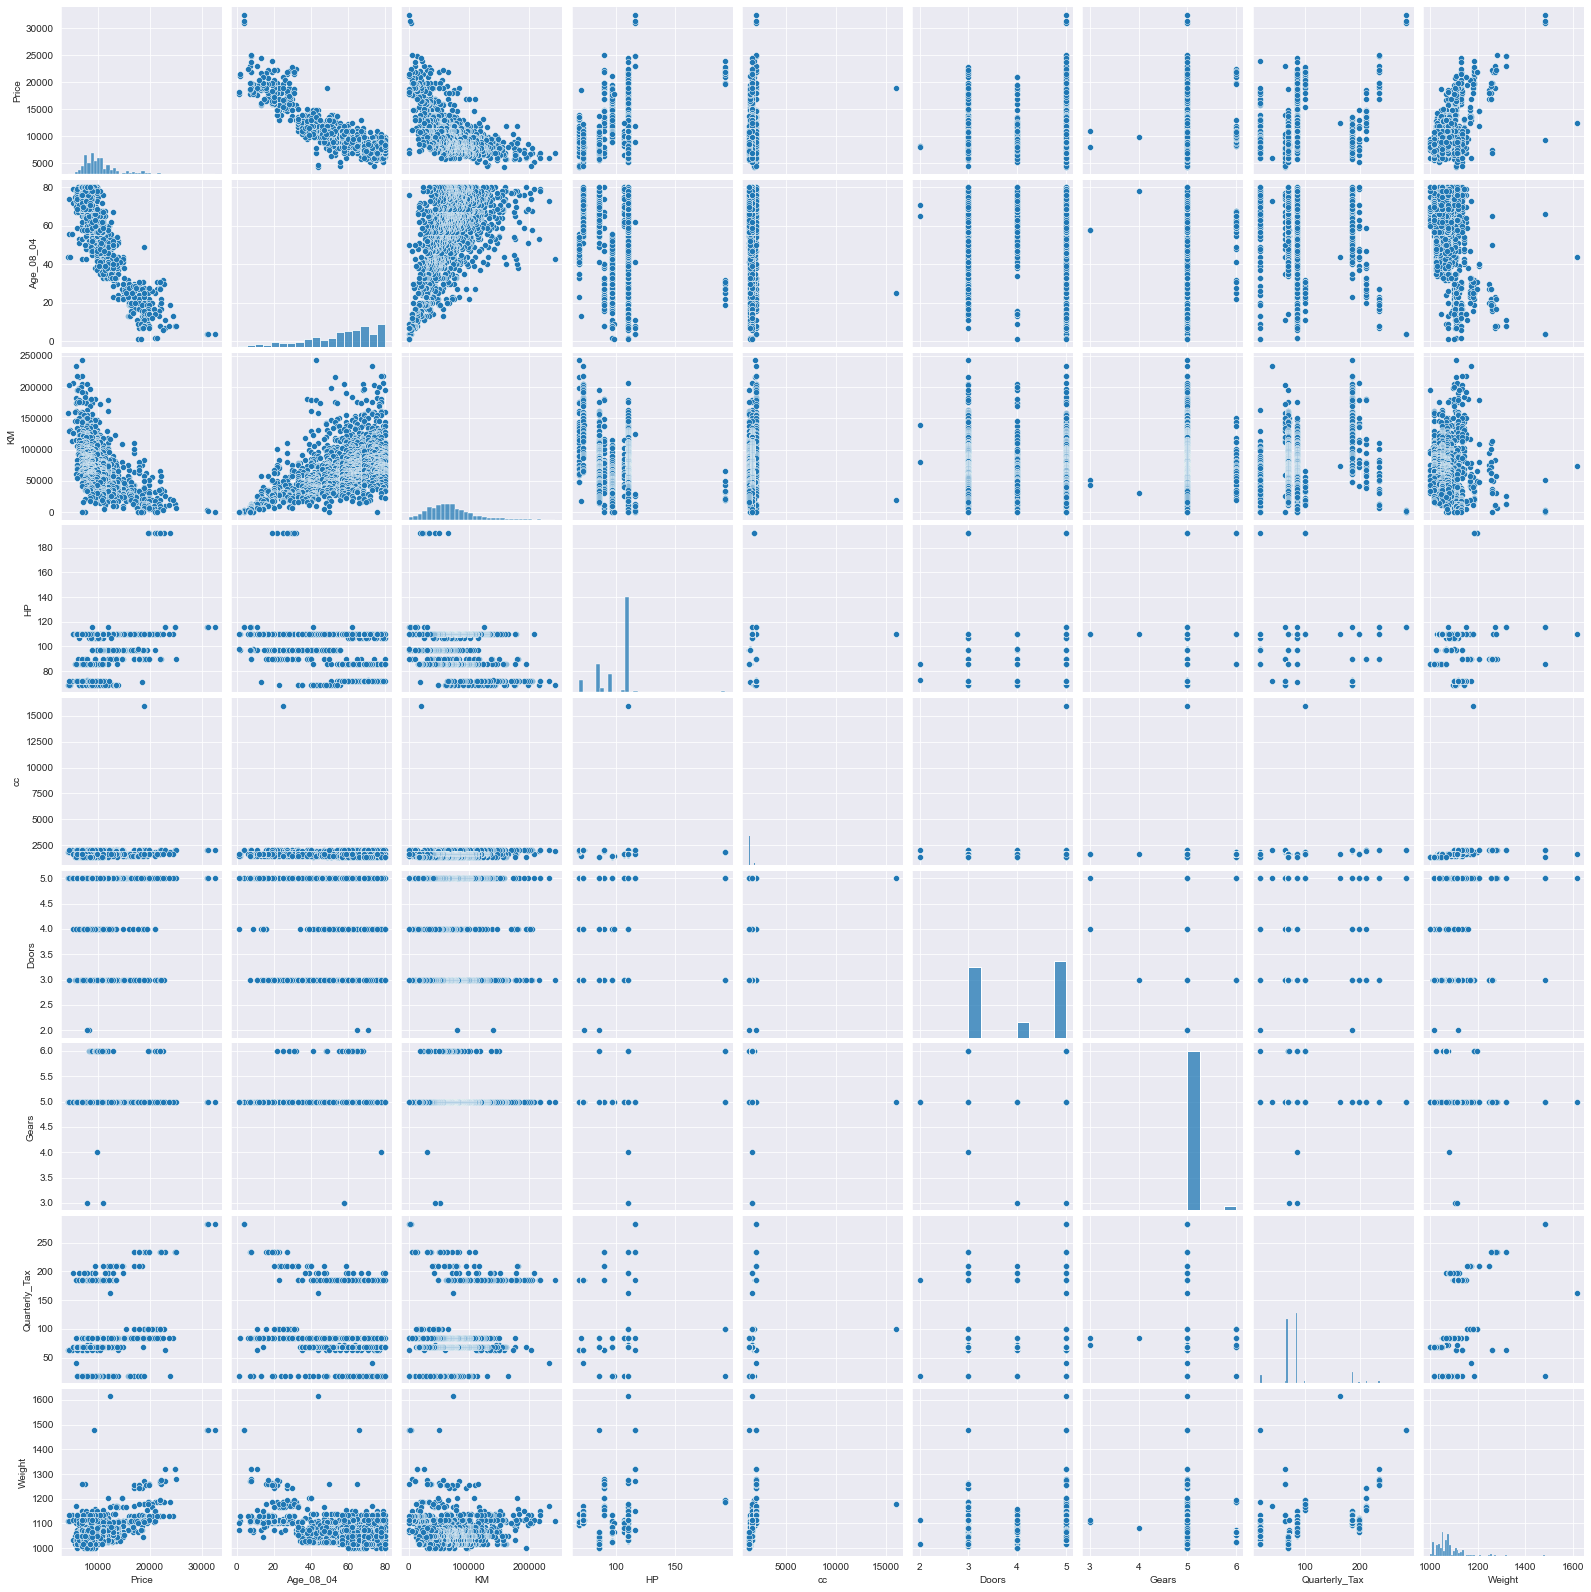

In [10]:
#scatterplot between varaible along with histograms
#format the plot background and scatter the plots for all the variables
sns.set_style(style="darkgrid")
sns.pairplot(toyo1)

<AxesSubplot:>

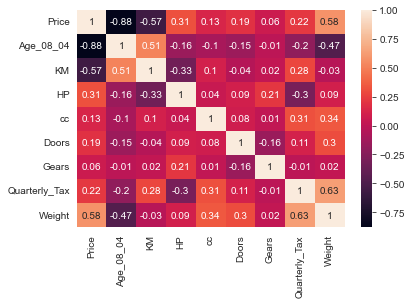

In [11]:
corr_matrix = toyo1.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

In [12]:
#numbering the columns
toyo1.columns
cols = toyo1.columns
for i,j in enumerate(cols):
    print(i,j, end=" \n ")

0 Price 
 1 Age_08_04 
 2 KM 
 3 HP 
 4 cc 
 5 Doors 
 6 Gears 
 7 Quarterly_Tax 
 8 Weight 
 

In [13]:
#preparing the model 
# build model
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo1).fit()

In [14]:

#coefficint
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [15]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [16]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [17]:
#model testing
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:18:14   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#calculating vif
rsq_price=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo1).fit().rsquared
vif_price= 1/(1-rsq_price)

rsq_Age=smf.ols('Age_08_04~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo1).fit().rsquared
vif_Age= 1/(1-rsq_Age)

rsq_km=smf.ols('KM~Age_08_04+Price+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo1).fit().rsquared
vif_km= 1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age_08_04+KM+Price+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo1).fit().rsquared
vif_hp= 1/(1-rsq_hp)

rsq_cc=smf.ols('cc~Age_08_04+KM+HP+Price+Doors+Gears+Quarterly_Tax+Weight',data=toyo1).fit().rsquared
vif_cc= 1/(1-rsq_cc)

rsq_dr=smf.ols('Doors~Age_08_04+KM+HP+cc+Price+Gears+Quarterly_Tax+Weight',data=toyo1).fit().rsquared
vif_dr= 1/(1-rsq_dr)

rsq_Gr=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Price+Quarterly_Tax+Weight',data=toyo1).fit().rsquared
vif_Gr= 1/(1-rsq_Gr)

rsq_qt=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Price+Weight',data=toyo1).fit().rsquared
vif_qt= 1/(1-rsq_qt)

rsq_w=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Price',data=toyo1).fit().rsquared
vif_w= 1/(1-rsq_w)

#storing vif value in the dataframe 
d1 = { 'Variable':['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'], 'VIF':[vif_price,vif_Age,vif_km,vif_hp,vif_cc,vif_dr,vif_Gr,vif_qt,vif_w]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

Variable       VIF
0          Price  7.340136
1      Age_08_04  4.741730
2             KM  2.097055
3             HP  1.545112
4             cc  1.165368
5          Doors  1.156577
6          Gears  1.105727
7  Quarterly_Tax  2.326150
8         Weight  2.961102

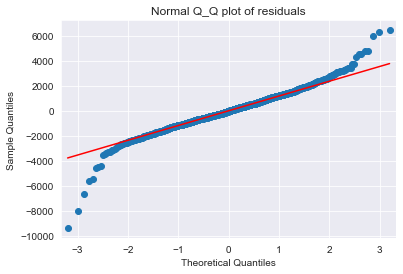

In [19]:
#residual analysis
#test for normality of residuals (Q-Q Plots)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q_Q plot of residuals")
plt.show()

In [20]:
toyo1.head(7)

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170
5  12950         32  61000  90  2000      3      5            210    1170
6  16900         27  94612  90  2000      3      5            210    1245

In [21]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [22]:
#Residual plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() 

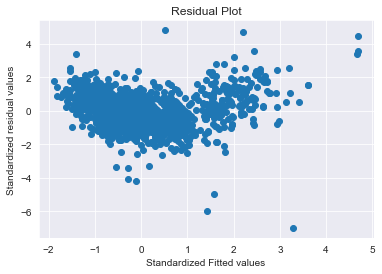

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


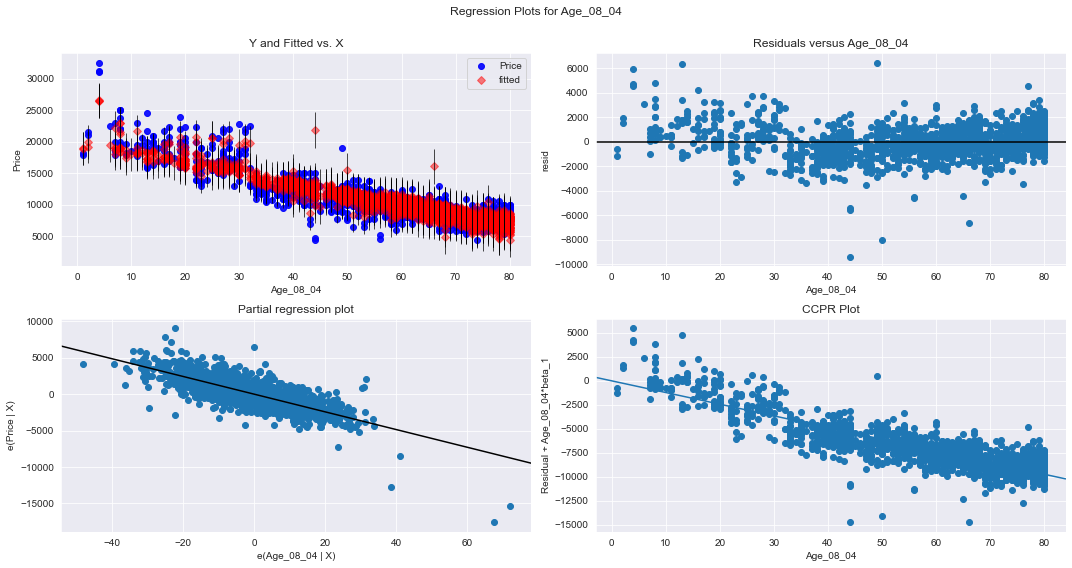

In [24]:
#residual vs regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


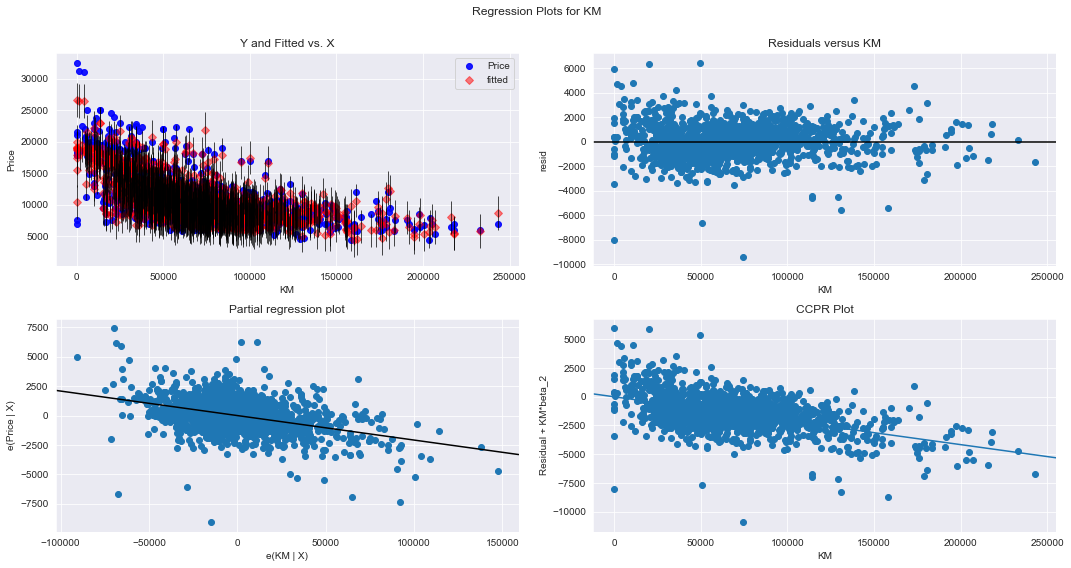

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


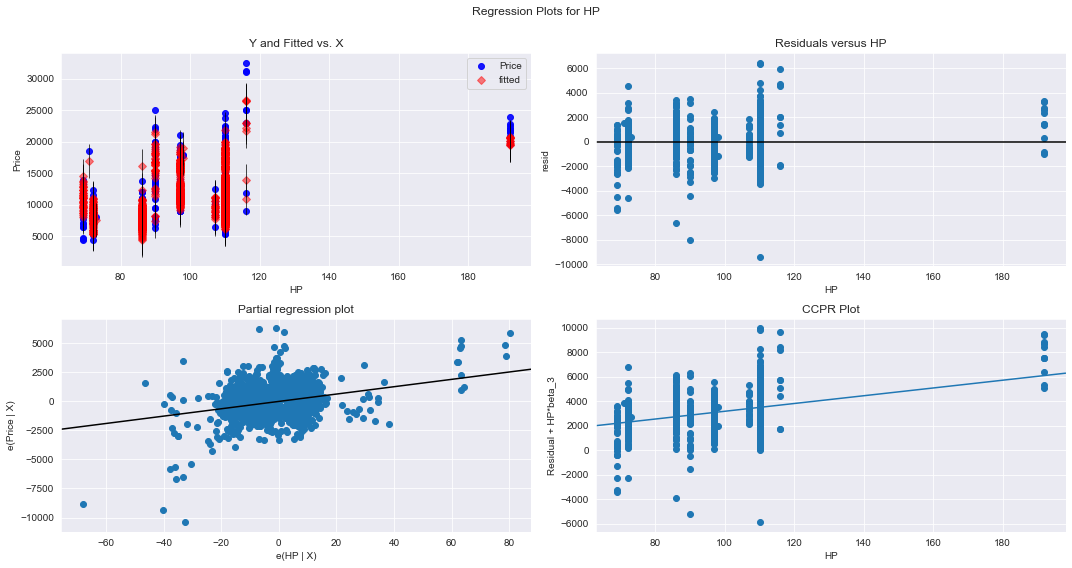

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


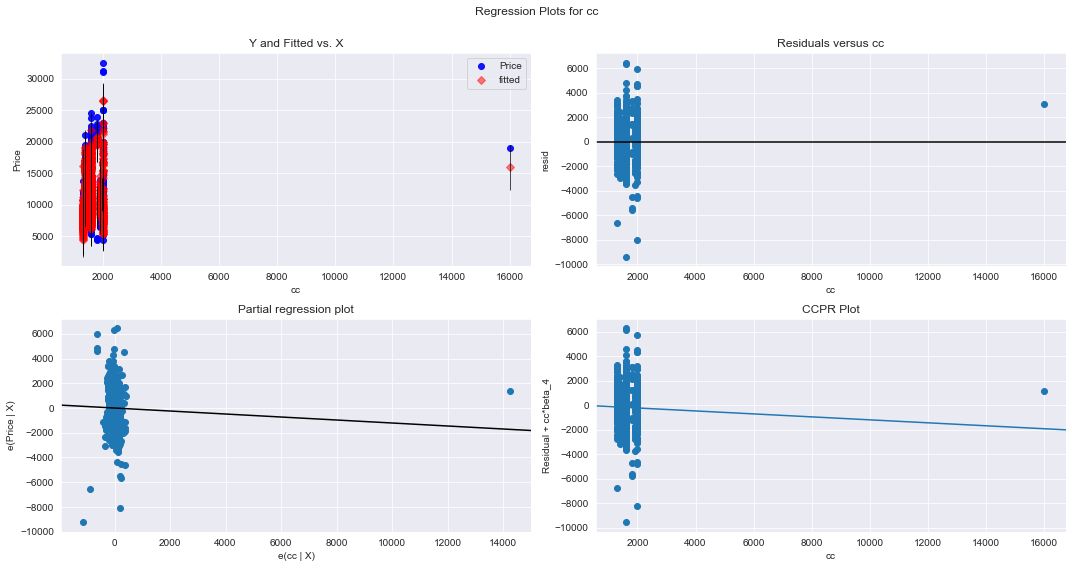

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


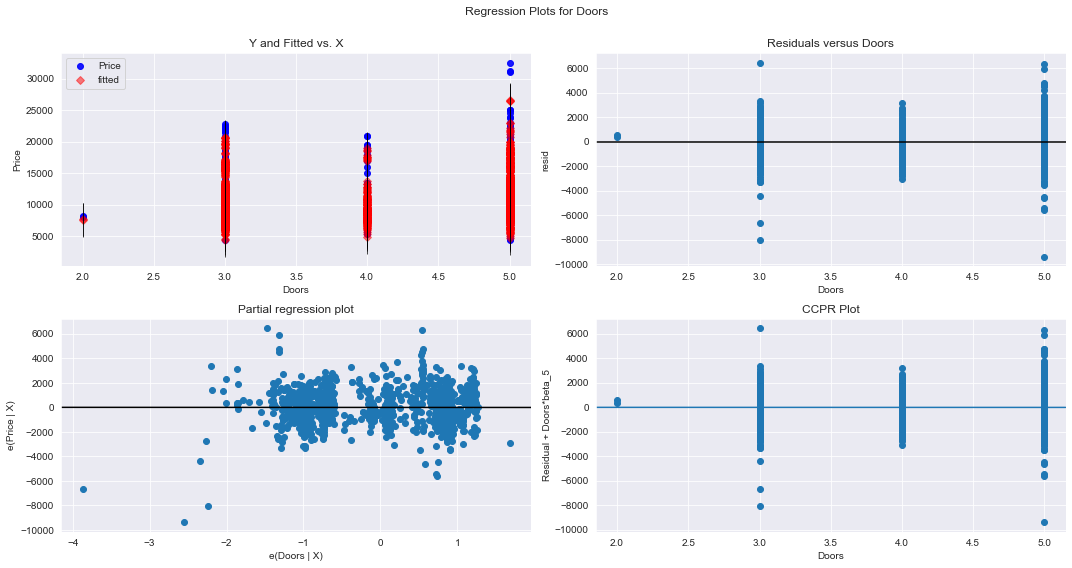

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


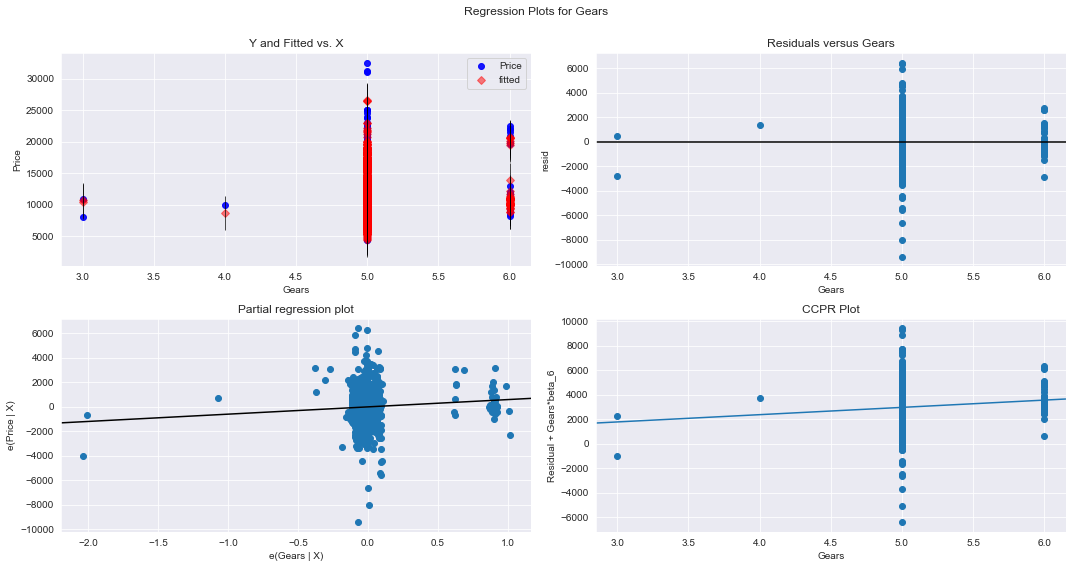

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


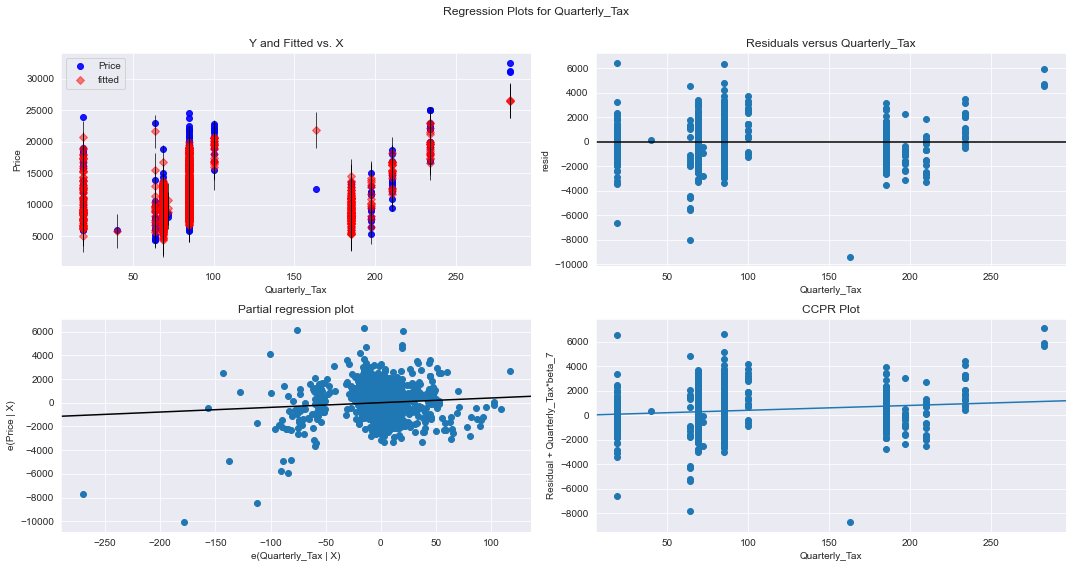

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


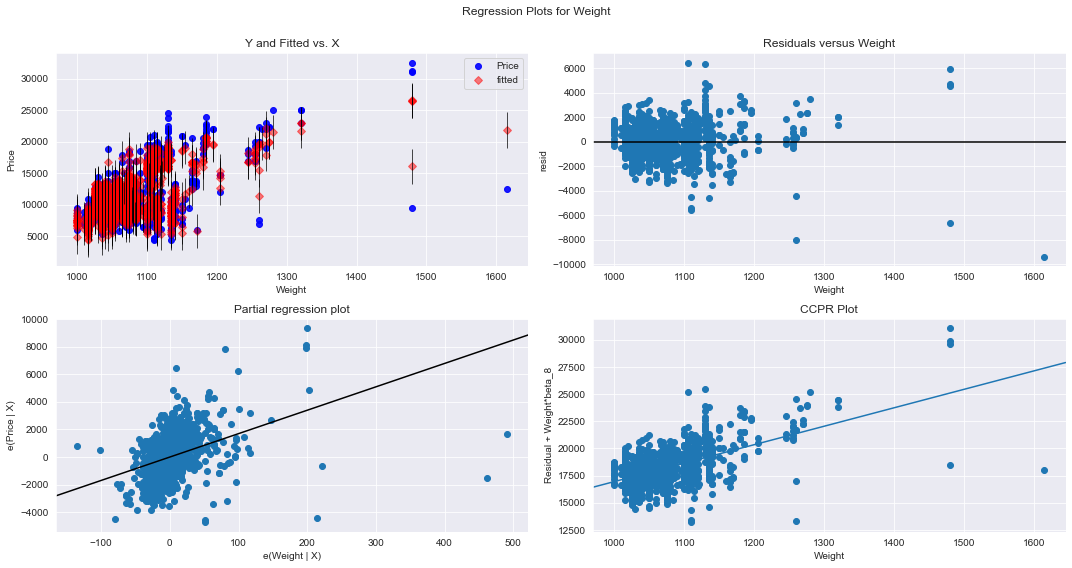

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [32]:
#model deletion diagnostics
#detecting influencers/Outliers
#Cook's Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

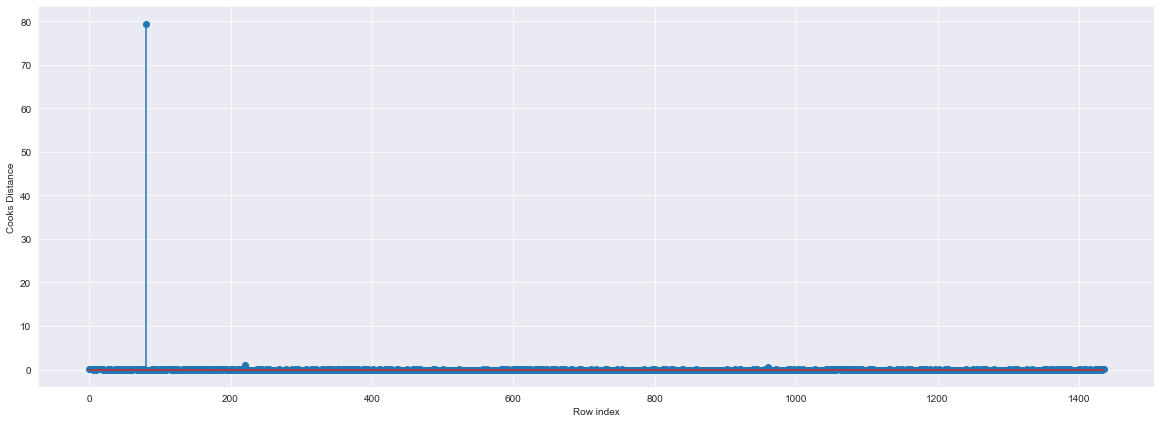

In [33]:
#plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyo1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138717)

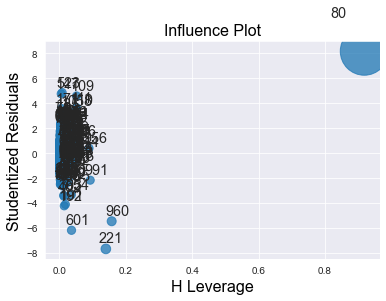

In [35]:
#high influence points
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model)
plt.show()

In [36]:
k = toyo1.shape[1]
n = toyo1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [37]:
#from the above plot, it is evident that data point 80 and 221 are the influencers
toyo1[toyo1.index.isin([80, 221, 960, 601])]

Price  Age_08_04     KM   HP     cc  Doors  Gears  Quarterly_Tax  Weight
80   18950         25  20019  110  16000      5      5            100    1180
221  12450         44  74172  110   1600      5      5            163    1615
601   7500         50      1   90   2000      3      5             64    1260
960   9390         66  50806   86   1300      3      5             19    1480

In [38]:
#see the difference in HP and other variable values
toyo1.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [39]:
#improving the model
#Load the data
toyo1_new = toyo1

In [40]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyo2=toyo1_new.drop(toyo1_new.index[[80,221, 960]],axis=0).reset_index()

In [41]:
#Drop the original index
toyo2=toyo2.drop(['index'],axis=1)

In [42]:
toyo2

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1428   7500         69  20544   86  1300      3      5             69    1025
1429  10845         72  19000   86  1300      3      5             69    1015
1430   8500         71  17016   86  1300      3      5             69    1015
1431   7250         70  16916   86  1300      3      5             69    1015
1432   6950         76      1  110  1600      5      5             19    1114

[1433 rows x 9 columns]

In [43]:
#build the model
#exculde variable "W" and generate R-squared and AIC values
final_ml_km=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=toyo2).fit()

In [44]:
(final_ml_km.rsquared,final_ml_km.aic)

(0.8397124658726294, 24945.82646421677)

In [45]:
#build the model
#exculde variable "km" and generate R-squared and AIC values
final_ml_w=smf.ols('Price~Age_08_04+Weight+HP+cc+Doors+Gears+Quarterly_Tax',data=toyo2).fit()

In [46]:
(final_ml_w.rsquared,final_ml_w.aic)

(0.8690184277561646, 24656.485640654686)

In [47]:
final_ml_hp=smf.ols('Price~Age_08_04+Weight+HP+cc+Doors+Gears+Quarterly_Tax',data=toyo2).fit()

In [48]:
(final_ml_hp.rsquared,final_ml_hp.aic)

(0.8690184277561646, 24656.485640654686)